In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [5]:
df = pd.read_excel("Random_leak_data_by_python_new.xlsx")
df.head()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
0,2024-09-11 01:07:51.672,39.929400,10.621079,18424.053113,1.027891,22.903695,91.492707,0
1,2024-09-11 01:08:51.672,28.772791,12.583485,19349.045753,1.062183,23.669735,90.480759,0
2,2024-09-11 01:09:51.672,40.683585,10.373292,16836.128391,1.198044,22.882568,91.501099,0
3,2024-09-11 01:10:51.672,30.132450,7.311777,13157.137992,1.147510,23.649962,91.316517,1
4,2024-09-11 01:11:51.672,43.363561,22.374388,13531.753162,1.021209,23.724924,90.813242,0


In [7]:
df.shape    # 8 columns and 1000 rows

(1000, 8)

In [9]:
df.describe()

,Timestamp,Pressure,Temperature,Frequency,Amplitude,Latitude,Longitude,Leak Condition
count,1000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2024-09-11 09:27:21.672000,32.279212,15.098940,16985.253316,0.999864,23.080595,91.076086,0.258000
min,2024-09-11 01:07:51.672000,20.002799,5.000084,12008.290348,0.800623,22.344266,90.400441,0.000000
25%,2024-09-11 05:17:36.672000,25.645795,10.018130,14561.355364,0.900608,22.748368,90.717697,0.000000
50%,2024-09-11 09:27:21.672000,31.921272,15.172110,16807.068037,0.998330,23.083174,91.064813,0.000000
75%,2024-09-11 13:37:06.672000,38.703124,19.982058,19426.435195,1.104858,23.424764,91.415869,1.000000
max,2024-09-11 17:46:51.672000,44.986369,24.997440,21993.122800,1.199776,23.777052,91.814580,1.000000
std,NaN,7.381763,5.756182,2891.156689,0.117223,0.401001,0.404323,0.437753


In [11]:
# Split the data into features (X) and target variable (y)

X = df.drop(columns=['Timestamp', 'Latitude', 'Longitude', 'Leak Condition'])
y = df['Leak Condition']

In [13]:
X.head()

,Pressure,Temperature,Frequency,Amplitude
0,39.929400,10.621079,18424.053113,1.027891
1,28.772791,12.583485,19349.045753,1.062183
2,40.683585,10.373292,16836.128391,1.198044
3,30.132450,7.311777,13157.137992,1.147510
4,43.363561,22.374388,13531.753162,1.021209


In [15]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Leak Condition, dtype: int64

In [17]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)  

# Importing train_test_split function from sklearn library
# Splitting the dataset into training and testing sets with 80% for training and 20% for testing

In [19]:
X_train.shape

(800, 4)

In [21]:
X_test.shape

(200, 4)

In [23]:
from sklearn.preprocessing import MinMaxScaler                    # Importing MinMaxScaler from sklearn.preprocessing
scaler = MinMaxScaler()                                           # Initializing MinMaxScaler object
X_train_scaled = scaler.fit_transform(X_train)                    # Scaling the training features using Min-Max scaling
X_test_scaled = scaler.fit_transform(X_test)                      # Scaling the testing features using Min-Max scaling

In [25]:
X_train_scaled

array([[0.86644992, 0.4360012 , 0.18844217, 0.59121496],
       [0.84313926, 0.09260726, 0.65462262, 0.0623835 ],
       [0.63440473, 0.68328105, 0.71504437, 0.13877925],
       ...,
       [0.39827878, 0.62740301, 0.87364972, 0.44882977],
       [0.46059965, 0.58472611, 0.28863769, 0.12982962],
       [0.00220662, 0.44523584, 0.60390752, 0.60050745]])

In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [29]:
# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=1)

# Train the model using the training data
dt_model.fit(X_train_scaled, y_train)


DecisionTreeClassifier(random_state=1)

In [31]:
# Use the trained model to predict the test data
y_pred = dt_model.predict(X_test_scaled)


In [33]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(conf_matrix)

# Classification report (precision, recall, F1-score)
class_report = classification_report(y_test, y_pred)
print('Classification Report:')
print(class_report)


Accuracy: 99.00%
Confusion Matrix:
[[151   2]
 [  0  47]]
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.96      1.00      0.98        47

    accuracy                           0.99       200
   macro avg       0.98      0.99      0.99       200
weighted avg       0.99      0.99      0.99       200



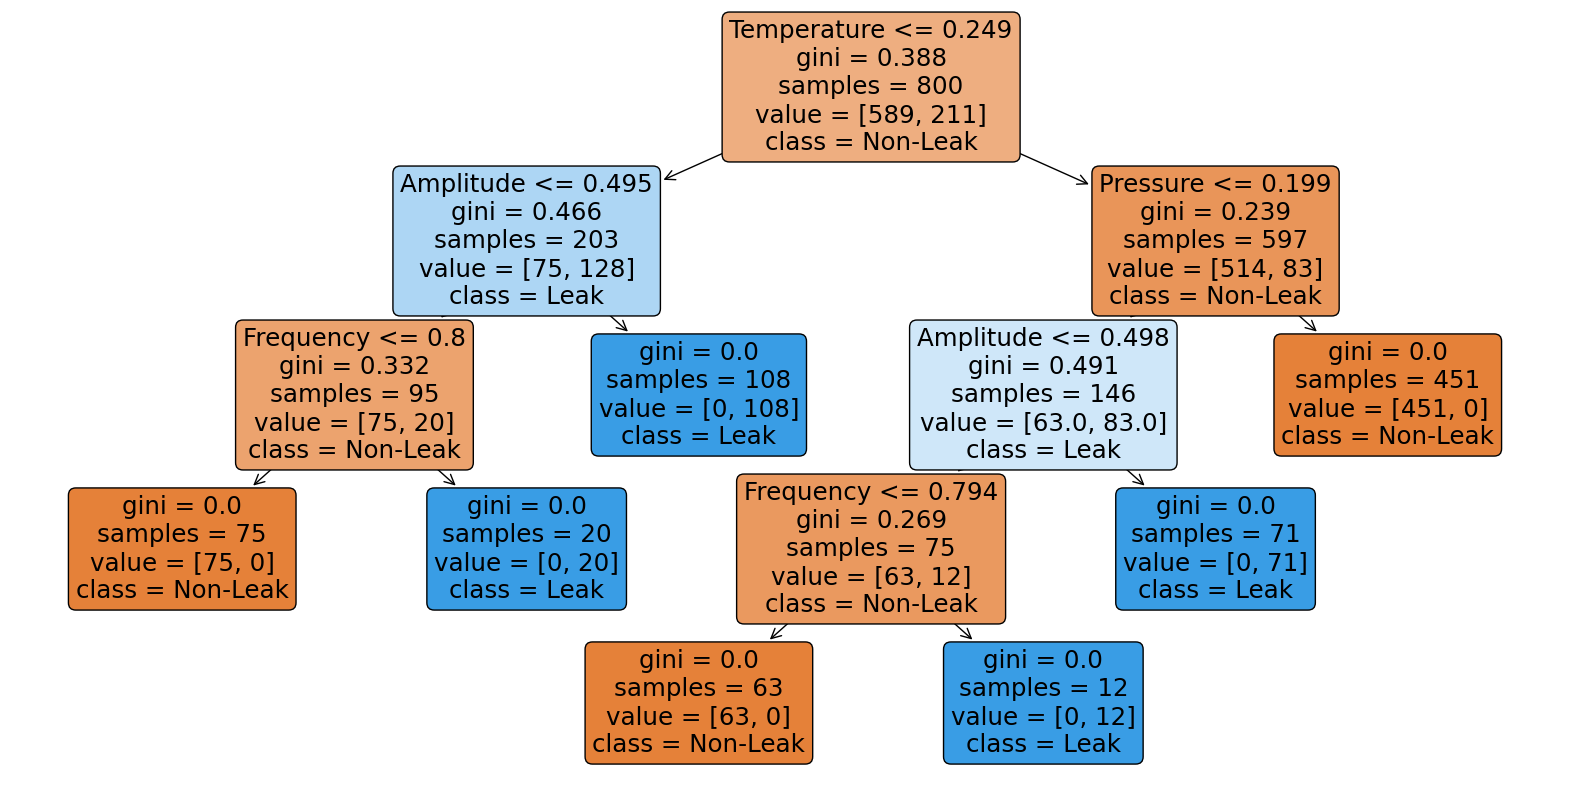

In [35]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Plotting the decision tree
plt.figure(figsize=(20,10))
plot_tree(dt_model, filled=True, feature_names=X.columns, class_names=['Non-Leak', 'Leak'], rounded=True)
plt.show()


A Gini score of 0 means the node is perfectly pure (i.e., it contains only one class).

A Gini score closer to 1 means the node is highly impure, containing a mix of classes.

The Gini Impurity for a node is calculated as:

𝐺𝑖𝑛𝑖 =1−∑(𝑝𝑖)2
Where 
𝑝𝑖 is the probability of a particular class at a given node.

# Confusion Matrix

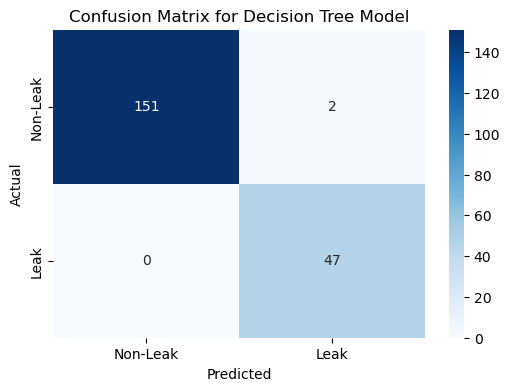

In [43]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Create the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plotting the confusion matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Leak', 'Leak'], yticklabels=['Non-Leak', 'Leak'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix for Decision Tree Model')
plt.show()


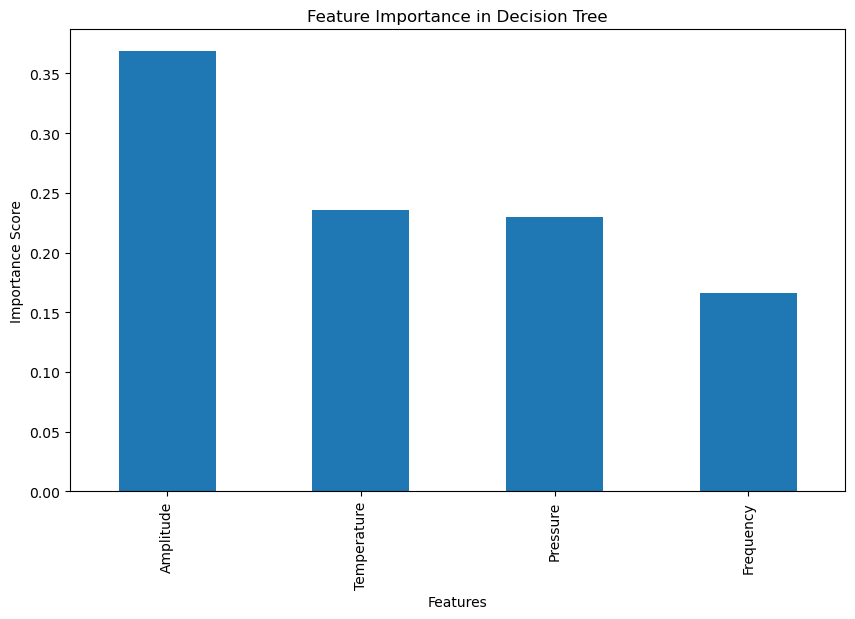

In [49]:
import pandas as pd

# Get feature importances
feature_importance = pd.Series(dt_model.feature_importances_, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Decision Tree')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


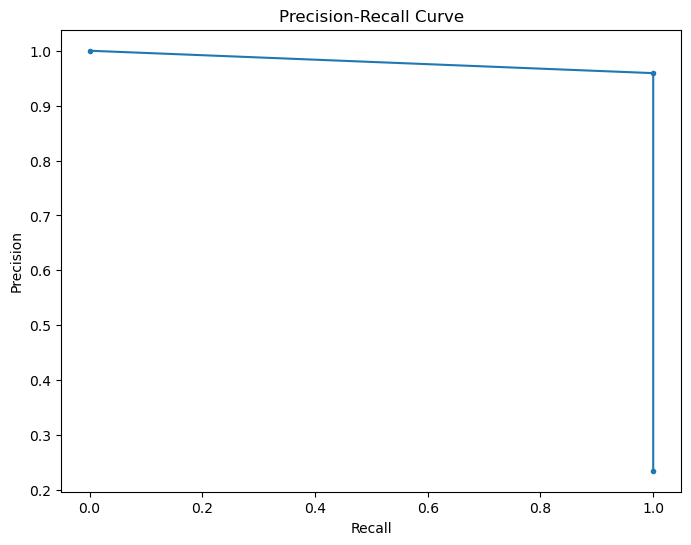

In [51]:
from sklearn.metrics import precision_recall_curve

# Get probabilities for the positive class (Leak)
y_scores = dt_model.predict_proba(X_test_scaled)[:, 1]
precision, recall, thresholds = precision_recall_curve(y_test, y_scores)

# Plot Precision-Recall curve
plt.figure(figsize=(8,6))
plt.plot(recall, precision, marker='.')
plt.title('Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()


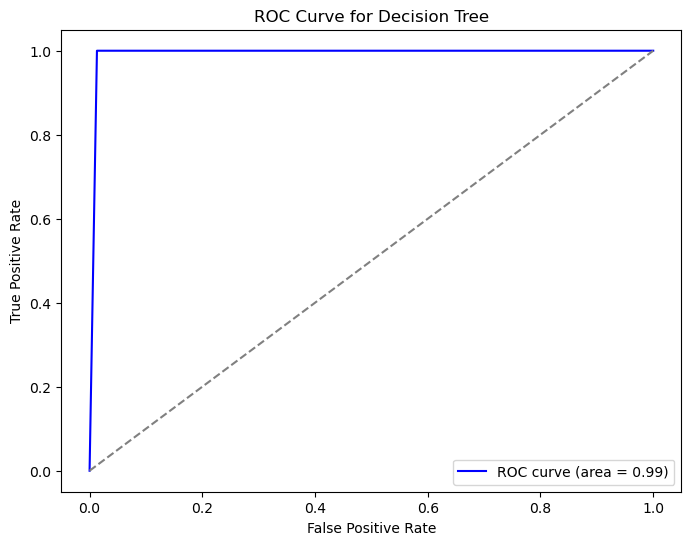

In [53]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for the positive class (Leak)
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonal line for random guess
plt.title('ROC Curve for Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


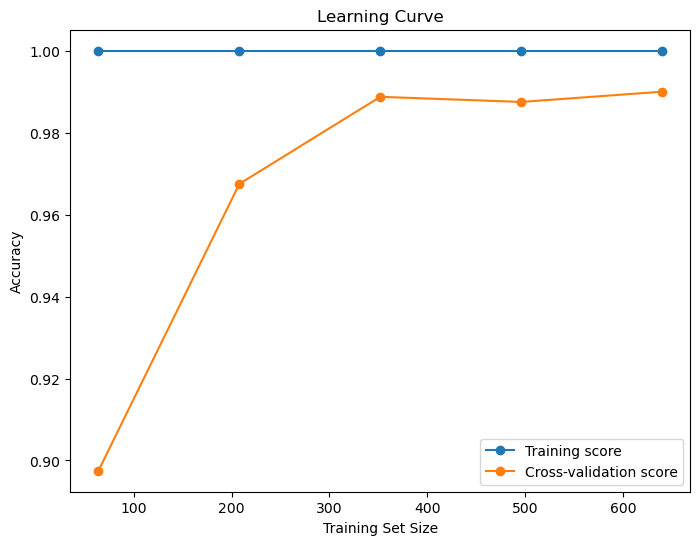

In [55]:
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(dt_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Calculate the mean and standard deviation for both train and test scores
train_mean = train_scores.mean(axis=1)
test_mean = test_scores.mean(axis=1)

# Plot the learning curve
plt.figure(figsize=(8,6))
plt.plot(train_sizes, train_mean, label='Training score', marker='o')
plt.plot(train_sizes, test_mean, label='Cross-validation score', marker='o')
plt.title('Learning Curve')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
